# О работе

Эта лабораторная работа направлена на знакомство с нейросетями.

Лабораторная состоит из следующих пунктов:
1. Полносвязные нейросети прямого распространения.
2. Свёрточные нейросети.
3. Рекуррентные нейросети.

## Импорт необходимых для работы библиотек

In [2]:
%pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Установка пакета pandas
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Установка пакета numpy
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Установка пакета matplotlib
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Установка пакета scikit-learn
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Установка пакета tensorflow
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Установка пакета re
%pip install re

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [9]:
# Установка пакета nltk
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Установка пакета zipfile
%pip install zipfile

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [11]:
# Установка пакета os
%pip install os

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [12]:
# Установка пакета shutil
%pip install shutil

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [13]:
# Установка пакета pathlib
%pip install pathlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Установка пакета matplotlib
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import string
import nltk
import zipfile
import os
import shutil
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\schif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\schif\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

## Подключение [датасета](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability/) из первой лабораторной

Замечание: так как датасет я искал не одним из первых среди студентов данного курса, то он вышел не совсем совершенным, из-за чего точность работы некоторых методов оставляет желать лучшего. 

### Считываем [датасет](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability/)

In [17]:
# Загоняем датасет в переменную "data_df" 
data_df = pd.read_csv('../DATASET/DATASET.csv')

### Вывод основной информации о датасете

In [18]:
# Выводим первые несколько рядком для того, чтобы понять, правильно ли загружены данные
data_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.00,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0.0
1,3.72,129.42,18630.06,6.64,0.00,592.89,15.18,56.33,4.50,0.0
2,8.10,224.24,19909.54,9.28,0.00,418.61,16.87,66.42,3.06,0.0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0.0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0.0


In [19]:
# Выводим размер датасета
data_df.size

32760

In [20]:
# Выводим информацию о типе данных каждой отдельно взятой колонке и общую информацию о таблице
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   float64
dtypes: float64(10)
memory usage: 256.1 KB


In [21]:
# Выводим количество содержащих значение "null" ячеек для каждой колонки
data_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [22]:
# Выводим количество рядков в датасете до очищения таблицы от тех, в которых содержиться "null"
data_df.shape

(3276, 10)

In [23]:
# Найдём рядки со значением "#NUM!" и удалим их из набора данных
data_df = data_df[data_df != '#NUM!'].dropna()

In [24]:
# Выводим количество рядков в датасете после очищения таблицы от тех, в которых содержиться "null"
data_df.shape

(3276, 10)

### Разбиение данных

In [25]:
data_df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [26]:
# Присваиваем переменной "X" таблицу, равную исходной, но без колонки 'Potability'
X = data_df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
# Присваиваем переменной "y" таблицу, равную колонке 'Potability'
Y = np.array(data_df[['Potability']])

# Генерируем тренировочные и тестовые данные случайно
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [27]:
# Проверяем правильно ли выглядят тренировочные данные
X_train.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2675,8.51,197.75,20098.20,6.46,344.13,555.92,9.03,78.93,3.88
1437,0.00,215.75,36776.14,6.67,294.11,489.89,11.18,0.00,4.75
2268,7.83,171.29,25918.57,8.59,307.23,448.56,16.41,60.18,3.53
1388,8.83,189.98,13527.99,7.15,408.59,338.51,18.54,0.00,3.05
1524,7.61,210.37,9583.71,8.51,371.47,325.68,11.78,86.51,5.55


In [28]:
# Проверяем правильно ли выглядят тестовые данные
X_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1131,0.00,259.14,2808.03,10.09,392.83,354.41,13.90,63.86,4.08
1684,5.37,238.29,16262.94,7.51,255.54,393.53,12.47,27.10,3.18
1183,7.06,188.39,20567.15,7.44,360.32,656.92,16.27,84.83,4.40
1628,6.77,178.33,16980.26,7.05,369.91,299.40,18.70,62.87,3.85
1904,6.96,180.40,12878.18,6.42,0.00,358.52,16.33,66.30,4.49


In [29]:
print("Количество рядков в тренировочных данных: \"" + str(X_train.shape[0]) + "\".")
print("Количество рядков в тестовых данных: \"" + str(X_test.shape[0]) + "\".")

Количество рядков в тренировочных данных: "2620".
Количество рядков в тестовых данных: "656".


In [30]:
# Проверяем правильно выглядят тренировочные данные
Y_train

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]])

In [31]:
# Проверяем правильно выглядят тестовые данные
Y_test

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [32]:
print("Количество рядков в тренировочных данных: \"" + str(Y_train.shape[0]) + "\".")
print("Количество рядков в тестовых данных: \"" + str(Y_test.shape[0]) + "\".")

Количество рядков в тренировочных данных: "2620".
Количество рядков в тестовых данных: "656".


### Масштабирование данных

In [33]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [34]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

## Полносвязные нейросети прямого распространения

In [35]:
model = keras.Sequential([
    keras.layers.Dense(256, activation="relu", input_shape=(X_train.shape[-1], )),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation="sigmoid"),
    ])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 36609 (143.00 KB)
Trainable params: 36097 (141.00 KB)
Non-trainable params: 512 (2.00 KB)
__________________

In [37]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

In [38]:
model_1_fit = model.fit(
    X_train, 
    Y_train,
    validation_data=(X_test, Y_test),
    verbose=2,
    callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.keras")],
    epochs=30, 
    batch_size=128
)

Epoch 1/30


21/21 - 2s - loss: 0.7570 - accuracy: 0.6172 - val_loss: 0.7155 - val_accuracy: 0.5808 - 2s/epoch - 77ms/step
Epoch 2/30
21/21 - 0s - loss: 0.7332 - accuracy: 0.6156 - val_loss: 0.7049 - val_accuracy: 0.5808 - 135ms/epoch - 6ms/step
Epoch 3/30
21/21 - 0s - loss: 0.7169 - accuracy: 0.6099 - val_loss: 0.7087 - val_accuracy: 0.5808 - 150ms/epoch - 7ms/step
Epoch 4/30
21/21 - 0s - loss: 0.7042 - accuracy: 0.6122 - val_loss: 0.7023 - val_accuracy: 0.5808 - 150ms/epoch - 7ms/step
Epoch 5/30
21/21 - 0s - loss: 0.6930 - accuracy: 0.6050 - val_loss: 0.6959 - val_accuracy: 0.5777 - 133ms/epoch - 6ms/step
Epoch 6/30
21/21 - 0s - loss: 0.6904 - accuracy: 0.6065 - val_loss: 0.6919 - val_accuracy: 0.5762 - 132ms/epoch - 6ms/step
Epoch 7/30
21/21 - 0s - loss: 0.6849 - accuracy: 0.6019 - val_loss: 0.6898 - val_accuracy: 0.5732 - 132ms/epoch - 6ms/step
Epoch 8/30
21/21 - 0s - loss: 0.6924 - accuracy: 0.5901 - val_loss: 0.6875 - val_accuracy: 0.5747 - 117ms/epoch - 6ms/step
Epoch 9/30
21/21

In [39]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test.argmax(axis=1),predictions.argmax(axis=1)))

21/21 [==============================] - 0s 834us/step
1.0


## Подключение [датасета](https://www.kaggle.com/datasets/anirudhg15/bears-fastai-2021) для свёрточных нейросетей

In [40]:
# Директория, в которй храняться оригиналы фото
path_base_original = '../FILES/LAB_03_IMAGES/originals/'

# Директория, в которй храняться тренировочные фото
path_base_train = '../FILES/LAB_03_IMAGES/train'
os.makedirs(path_base_train, exist_ok=True)

# Директория, в которй храняться тестовые фото
path_base_test = '../FILES/LAB_03_IMAGES/test'
os.makedirs(path_base_test, exist_ok=True)

In [41]:
import glob
import os
path = os.path.join(path_base_train, 'black/*')
for file in glob.glob(path):
    new_file = file.replace('.JPG', '.jpeg')
    os.rename(file, new_file)

path = os.path.join(path_base_train, 'grizzly/*')
for file in glob.glob(path):
    new_file = file.replace('.JPG', '.jpeg')
    os.rename(file, new_file)

path = os.path.join(path_base_train, 'teddy/*')
for file in glob.glob(path):
    new_file = file.replace('.JPG', '.jpeg')
    os.rename(file, new_file)

In [42]:
images = pathlib.Path(path_base_train).with_suffix('')

black_images = list(images.glob('black/*.jpeg'))
grizzly_images = list(images.glob('grizzly/*.jpeg'))
teddy_images = list(images.glob('teddy/*.jpeg'))

print(black_images, grizzly_images, teddy_images)

[WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000000.jpeg'), WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000001.jpeg'), WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000002.jpeg'), WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000003.jpeg'), WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000005.jpeg'), WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000006.jpeg'), WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000007.jpeg'), WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000008.jpeg'), WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000009.jpeg'), WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000011.jpeg'), WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000012.jpeg'), WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000013.jpeg'), WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000014.jpeg'), WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000016.jpeg'), WindowsPath('../FILES/LAB_03_IMAGES/train/black/00000017.jpeg'), WindowsPath('../FILES/LA

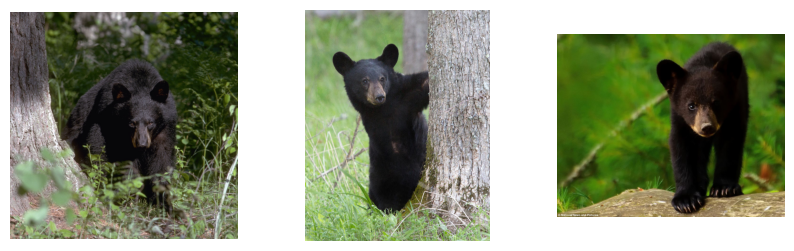

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, img_path in enumerate(black_images[:3]):
  img = mpimg.imread(str(img_path))
  axes[i].imshow(img)
  axes[i].axis('off')
plt.show()

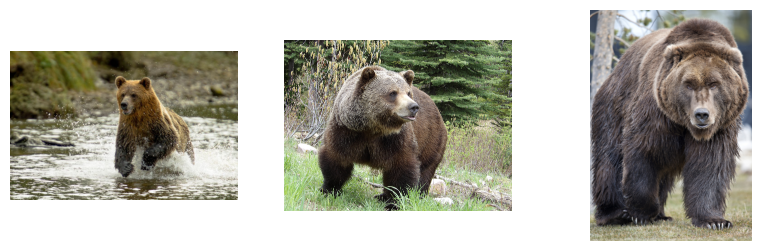

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, img_path in enumerate(grizzly_images[:3]):
  img = mpimg.imread(str(img_path))
  axes[i].imshow(img)
  axes[i].axis('off')
plt.show()

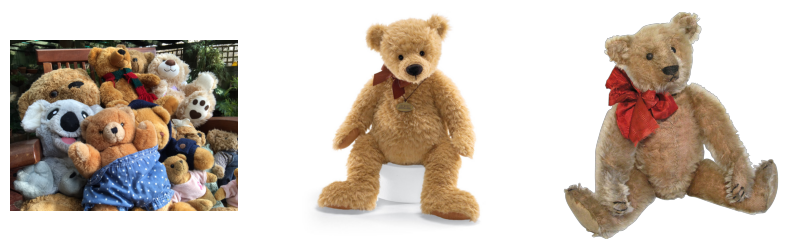

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, img_path in enumerate(teddy_images[:3]):
  img = mpimg.imread(str(img_path))
  axes[i].imshow(img)
  axes[i].axis('off')
plt.show()

In [46]:
batch_size = 32
image_height = 720
image_width = 1280

In [47]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal", input_shape=(image_height, image_width, 3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ])

In [48]:
train = keras.utils.image_dataset_from_directory(
    images, 
    validation_split=0.2, 
    subset="training", 
    seed=123, 
    image_size=(image_height, image_width), 
    batch_size=32
)

Found 260 files belonging to 3 classes.
Using 208 files for training.


In [49]:
class_names = train.class_names
print(class_names)

['black', 'grizzly', 'teddy']


In [50]:
val = keras.utils.image_dataset_from_directory(
    images, 
    validation_split=0.2, 
    subset="validation", 
    seed=123, 
    image_size=(image_height, image_width), 
    batch_size=batch_size
)

Found 260 files belonging to 3 classes.
Using 52 files for validation.


In [51]:
AUTOTUNE = tf.data.AUTOTUNE
train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

## Свёрточные нейросети

In [52]:
model = keras.Sequential([
  data_augmentation,
  keras.layers.Rescaling(1./255),
  keras.layers.Conv2D(64, 3, strides=2, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Conv2D(128, 3, strides=2, padding='same', activation='tanh'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.3),
  keras.layers.Conv2D(256, 3, strides=2, padding='same', activation='tanh'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='sigmoid'),
  keras.layers.Dense(3, name="outputs")
])

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 720, 1280, 3)      0         
                                                                 
 rescaling (Rescaling)       (None, 720, 1280, 3)      0         
                                                                 
 conv2d (Conv2D)             (None, 360, 640, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 180, 320, 64)      0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 180, 320, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 160, 128)     

In [54]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [55]:
model.fit(train, validation_data = val, epochs=5)

Epoch 1/5
7/7 [==============================] - 255s 33s/step - loss: 1.8965 - accuracy: 0.5192 - val_loss: 2.7214 - val_accuracy: 0.2885
Epoch 2/5
7/7 [==============================] - 235s 33s/step - loss: 0.6551 - accuracy: 0.7404 - val_loss: 1.2512 - val_accuracy: 0.2885
Epoch 3/5
7/7 [==============================] - 241s 35s/step - loss: 0.4774 - accuracy: 0.8125 - val_loss: 0.7379 - val_accuracy: 0.7115
Epoch 4/5
7/7 [==============================] - 264s 38s/step - loss: 0.3969 - accuracy: 0.8365 - val_loss: 1.2075 - val_accuracy: 0.3846
Epoch 5/5
7/7 [==============================] - 262s 37s/step - loss: 0.4279 - accuracy: 0.8510 - val_loss: 1.0752 - val_accuracy: 0.4615


1/1 [==============================] - 0s 127ms/step
tf.Tensor([0.6481221  0.23759304 0.11428485], shape=(3,), dtype=float32)
That's a black bear!
Confidence: 64.81 %.


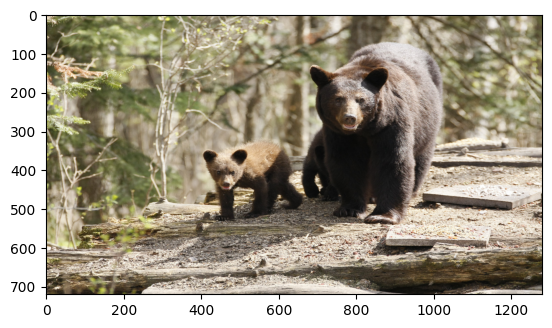

In [59]:
image = tf.keras.preprocessing.image.load_img( os.path.join(path_base_test, 'black/00000072.jpeg'), target_size=((image_height, image_width)))
plt.imshow(image)

input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])

input_arr = input_arr.astype('float32') / 255.

predictions = model.predict(input_arr)
score = tf.nn.softmax(predictions[0])
print(score)
print("That's a {} bear!".format(class_names[np.argmax(score)]))
print("Confidence: {:.2f} %.".format(100 * np.max(score)))

## Подключение [датасета](https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews) для рекуррентных нейросетей

Замечание: так как датасет я искал не одним из первых среди студентов данного курса, то он вышел не совсем совершенным, из-за чего точность работы некоторых методов оставляет желать лучшего. 

### Считываем [датасет](https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews)

In [110]:
# Загоняем датасет в переменную "data_df" 
data_df = pd.read_csv('../DATASET/IMDB_DATASET.csv')

### Вывод основной информации о датасете

In [111]:
# Выводим первые несколько рядком для того, чтобы понять, правильно ли загружены данные
data_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [112]:
# Выводим размер датасета
data_df.size

100000

In [113]:
# Выводим информацию о типе данных каждой отдельно взятой колонке и общую информацию о таблице
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [114]:
# Выводим количество содержащих значение "null" ячеек для каждой колонки
data_df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [115]:
# Выводим количество рядков в датасете до очищения таблицы от тех, в которых содержиться "null"
data_df.shape

(50000, 2)

In [116]:
data_df = data_df.dropna().reset_index(drop=True)

In [117]:
# Выводим количество рядков в датасете после очищения таблицы от тех, в которых содержиться "null"
data_df.shape

(50000, 2)

### Токенизация

In [118]:
Data = data_df[['review','sentiment']]
print(Data['review'][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [119]:
words = word_tokenize(Data['review'][0])
words

['One',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'Oz',
 'episode',
 'you',
 "'ll",
 'be',
 'hooked',
 '.',
 'They',
 'are',
 'right',
 ',',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'Oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 ',',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'GO',
 '.',
 'Trust',
 'me',
 ',',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 '.',
 'This',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 ',',
 'sex',
 'or',
 'violence',
 '.',
 'Its',
 'is',
 'hardcore',
 ',',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'It',
 'is',
 'called',
 'OZ',
 'as',


### Очистка от запрещённых слов

In [120]:
def clean_text(text): 
    text = str(text)
    text = text.lower()
    text = re.sub("\d", " ", text)
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    stop_words = stopwords.words("english")
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

In [121]:
Data['review'] = [clean_text(review) for review in Data['review']]
Data

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1
...,...,...
49995,thought movie right good job creative original...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,going disagree previous comment side maltin on...,0


### Разбиение данных на тестовые и тренировочные

In [122]:
X_train, X_test, y_train, y_test = train_test_split(Data['review'], Data['sentiment'], test_size=0.30)

In [123]:
print(y_train)

21761    0
39599    1
26995    1
30944    1
11237    1
        ..
18821    0
18839    0
29214    1
34599    0
27520    1
Name: sentiment, Length: 35000, dtype: int64


In [124]:
vocab_size = 10000
oov_token = ""
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [125]:
X_train_text_sequences = tokenizer.texts_to_sequences(X_train)
X_test_text_sequences = tokenizer.texts_to_sequences(X_test)

In [126]:
max_length = 100
padding_type = "post"
trunction_type="post"
X_train = keras.utils.pad_sequences(X_train_text_sequences,maxlen=max_length, padding=padding_type, truncating=trunction_type)
X_test = keras.utils.pad_sequences(X_test_text_sequences,maxlen=max_length, padding=padding_type, truncating=trunction_type)

In [127]:
X_train.shape

(35000, 100)

## Рекуррентные нейросети

In [135]:
emb_dim = 128

model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, emb_dim, input_length = max_length))
model.add(LSTM(64))
model.add(Dense(1, activation='selu'))

In [136]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.binary_crossentropy,
              metrics=['accuracy']
)

In [138]:
model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
   1/1094 [..............................] - ETA: 3:33 - loss: 0.6031 - accuracy: 0.6250

1094/1094 [==============================] - 222s 203ms/step - loss: 0.7536 - accuracy: 0.6072 - val_loss: 0.5031 - val_accuracy: 0.8155
Epoch 2/2
1094/1094 [==============================] - 221s 202ms/step - loss: 0.4021 - accuracy: 0.8421 - val_loss: 0.4962 - val_accuracy: 0.8166


In [139]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

469/469 [==============================] - 8s 17ms/step - loss: 0.4962 - accuracy: 0.8166
0.49615511298179626
0.8166000247001648
